# **Prodigy Infotech**
# Basmala Yasser
# Task:03

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [3]:
from google.colab import files
upload= files.upload()

Saving bank-full.csv to bank-full.csv


In [16]:
#Load the dataset with the correct delimiter
df = pd.read_csv('bank-full.csv',sep=';')


In [17]:
#Print columns to inspect their names and contents
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [18]:
X= df.drop(columns=['y']) # Features
y = df['y'] # Target variable
categorical_colums = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
X_E = pd.get_dummies (X, columns=categorical_colums)
print(X_E)

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       58     2143    5       261         1     -1         0       False   
1       44       29    5       151         1     -1         0       False   
2       33        2    5        76         1     -1         0       False   
3       47     1506    5        92         1     -1         0       False   
4       33        1    5       198         1     -1         0       False   
...    ...      ...  ...       ...       ...    ...       ...         ...   
45206   51      825   17       977         3     -1         0       False   
45207   71     1729   17       456         2     -1         0       False   
45208   72     5715   17      1127         5    184         3       False   
45209   57      668   17       508         4     -1         0       False   
45210   37     2971   17       361         2    188        11       False   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
0   

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_E, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier with pruning parameters
CLF = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=20, min_samples_leaf=10)

#Train the classifier
CLF.fit(X_train, y_train)

#Predict on the test data
y_pred = CLF.fit(X_train, y_train).predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8959416122968041

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7952
         yes       0.65      0.30      0.41      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



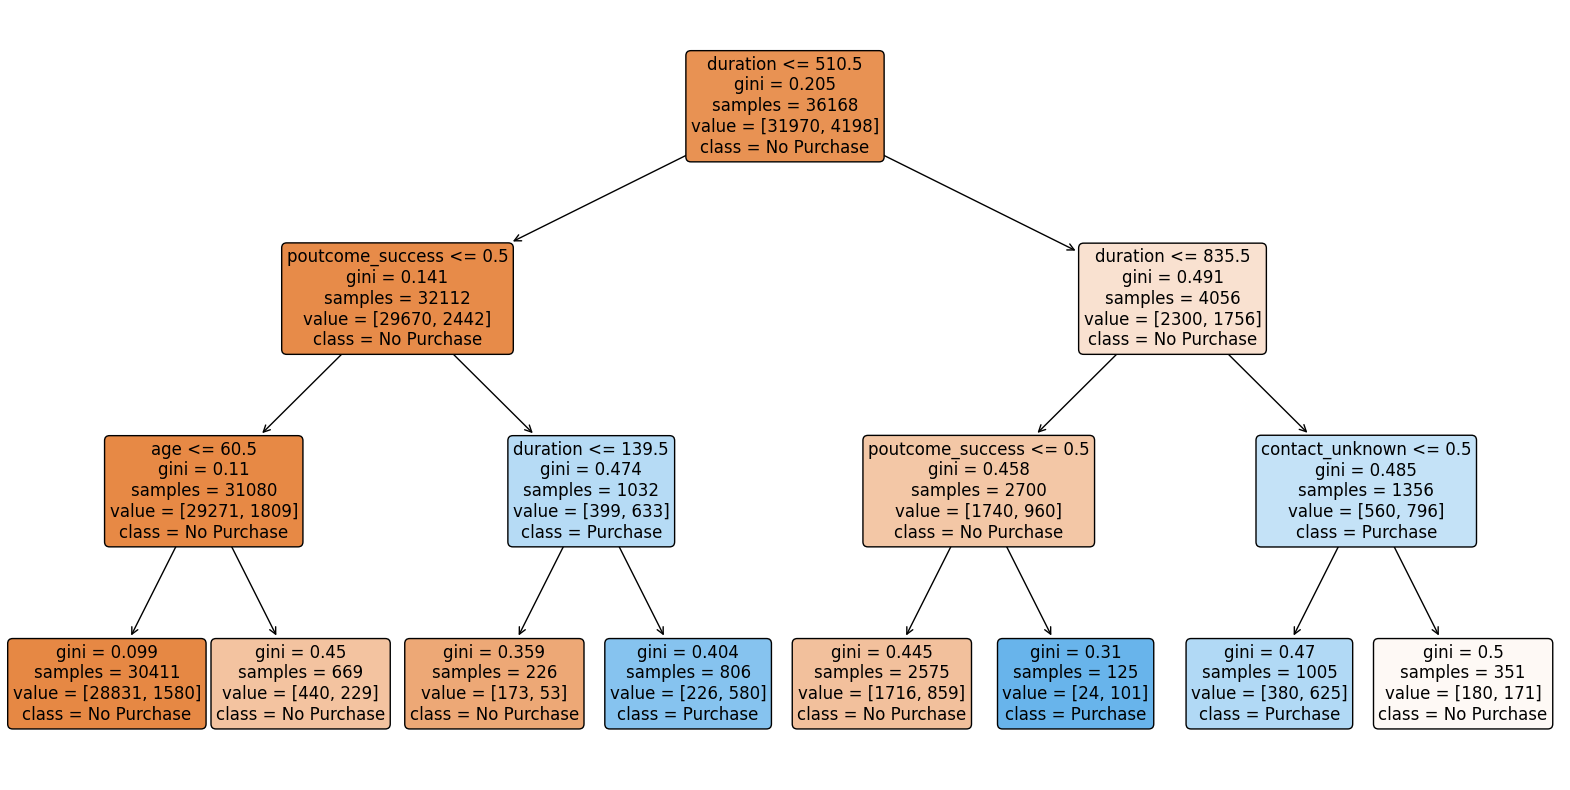

In [31]:
plt.figure(figsize=(20, 10)) # Set the figure size
plot_tree(CLF, filled=True, feature_names=list(X_E.columns), rounded=True, fontsize=12, class_names=['No Purchase', 'Purchase'])
plt.show(block=True)